流程：
- 选定model（AutoModelForCausalLM）和tokenizer(AutoTokenizer)
- 弄出message字典(也可以是直接prompt字符串)
- tokenizer.apply_chat_template加入特殊标识符
- tokenize
- 结果给model.generate函数
- 结果给tokenizer.decode或者batch_decode函数

使用pipeline:
- 选定model（AutoModelForCausalLM）和tokenizer(AutoTokenizer)
- pipeline弄出generator对象
- 给定message字典
- output = generator(message)
- output[0]["generated_text"] 就是结果

In [47]:
from transformers import AutoModelForCausalLM, AutoTokenizer

# 加载模型和 tokenizer
model = AutoModelForCausalLM.from_pretrained(
    "Qwen/Qwen2.5-0.5B-Instruct",
    device_map="cuda",
    torch_dtype="auto",
    trust_remote_code=True,
)
tokenizer = AutoTokenizer.from_pretrained("Qwen/Qwen2.5-0.5B-Instruct")

>  解释原文中为什么要写一个 <|assistant|>？这是因为原文中用得是：microsoft/Phi-3-mini-4k-instruct，它用 <|assistant|> 表示 AI 回答开始。构成的格式如下：
> ```
> <|system|>
> You are a helpful assistant.<|end|>
> <|user|>
> How to explain Internet for a medieval knight?<|end|>
> <|assistant|>
> ```


```python

# 原文。这里的 <|assistant|> 是为了让模型能
prompt = "帮我写一个请教条，原因是自己生病了。<|assistant|>"

# Tokenize the input prompt
input_ids = tokenizer(prompt, return_tensors="pt").input_ids.to("cuda")
```

Qwen 的模型和它有什么区别呢？
```
<|im_start|>user
讲一个猫有关的笑话？<|im_end|>
<|im_start|>assistant
```

In [48]:
## 所以对于 Qwen 可以这么做？
### 中文
prompt = "帮我写一个请教条，原因是自己生病了。<|im_start|>assistant"
# apply_chat_template没有使用直接tokenize 是因为最后自己模拟加入了特殊标识符

# Tokenize the input prompt
input_ids = tokenizer(prompt, return_tensors="pt").input_ids.to("cuda")
# Generate the text
generation_output = model.generate(
  input_ids=input_ids,
  max_new_tokens=20
)

# Print the output
print(tokenizer.batch_decode(generation_output)[0])

帮我写一个请教条，原因是自己生病了。<|im_start|>assistant
尊敬的医生团队：

我最近感觉身体有些不适，特别是头晕、乏力和轻微的


In [50]:
input_ids1 = tokenizer([prompt], return_tensors="pt").input_ids.to("cuda")

# 有无这个[] 结果一样的


In [49]:
input_ids

tensor([[108965,  61443,  46944, 116069,  38989,   3837, 107711,  99283, 109281,
          34187,   1773, 151644,  77091]], device='cuda:0')

In [51]:
input_ids1

tensor([[108965,  61443,  46944, 116069,  38989,   3837, 107711,  99283, 109281,
          34187,   1773, 151644,  77091]], device='cuda:0')

In [6]:
generation_output

tensor([[108965,  61443,  46944, 116069,  38989,   3837, 107711,  99283, 109281,
          34187,   1773, 151644,  77091,     25,  58230,    232, 100098,   9370,
         103998,  48443,  35946, 104044, 104048,  99491, 108684,   3837, 100681,
         101099, 101895, 110237,   1773, 109194,  87026]], device='cuda:0')

In [8]:
print(tokenizer.decode(generation_output[0])) # batchdecode是对于二维的  decode是对于一维的

帮我写一个请教条，原因是自己生病了。<|im_start|>assistant: 尊敬的医生：

我最近感到非常不适，感觉身体有些不舒服。请问您


In [10]:
input_ids

tensor([[108965,  61443,  46944, 116069,  38989,   3837, 107711,  99283, 109281,
          34187,   1773, 151644,  77091]], device='cuda:0')

In [11]:
for id_ in input_ids[0]:
    print(tokenizer.decode(id_))  # 一个token可能是一个词 也可能是多个词

帮我
写
一个
请教
条
，
原因是
自己
生病
了
。
<|im_start|>
assistant


In [13]:
## 英文
prompt = "Write an email apologizing to Sarah for the tragic gardening mishap. Explain how it happened.<|assistant|>"

# Tokenize the input prompt
input_ids = tokenizer(prompt, return_tensors="pt").input_ids.to("cuda")
# Generate the text
generation_output = model.generate(
  input_ids=input_ids,
  max_new_tokens=20
)

# Print the output
print(tokenizer.decode(generation_output[0]))

Write an email apologizing to Sarah for the tragic gardening mishap. Explain how it happened.<|assistant|> Dear Sarah,

I hope this message finds you well. I wanted to apologize to you for the gardening


In [14]:
for id in input_ids[0]:
   print(tokenizer.decode(id)) # 可以看到英语的token可能是一个单词 可能是单词的一部分

Write
 an
 email
 apolog
izing
 to
 Sarah
 for
 the
 tragic
 gardening
 mish
ap
.
 Explain
 how
 it
 happened
.<
|
assistant
|
>


In [15]:
from transformers import AutoModelForCausalLM, AutoTokenizer

colors_list = [
    '102;194;165', '252;141;98', '141;160;203',
    '231;138;195', '166;216;84', '255;217;47'
]

def show_tokens(sentence, tokenizer_name):
    tokenizer = AutoTokenizer.from_pretrained(tokenizer_name)
    token_ids = tokenizer(sentence).input_ids
    for idx, t in enumerate(token_ids):
        print(
            f'\x1b[0;30;48;2;{colors_list[idx % len(colors_list)]}m' +
            tokenizer.decode(t) +
            '\x1b[0m',
            end=' '
        )  # x1b是控制代码
text = """
English and CAPITALIZATION
🎵 鸟
show_tokens False None elif == >= else: two tabs:"    " Three tabs: "       "
12.0*50=600
"""

In [16]:
show_tokens(text, "bert-base-uncased")

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

[CLS] english and capital ##ization [UNK] [UNK] show _ token ##s false none eli ##f = = > = else : two tab ##s : " " three tab ##s : " " 12 . 0 * 50 = 600 [SEP] 

In [17]:
show_tokens(text, "gpt2")

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]


 English  and  CAP ITAL IZ ATION 
 � � �  � � � 
 show _ t ok ens  False  None  el if  ==  >=  else :  two  tabs :"        "  Three  tabs :  "              " 
 12 . 0 * 50 = 600 
 

In [18]:
show_tokens(text, "Qwen/Qwen2.5-0.5B-Instruct")


 English  and  CAPITAL IZATION 
 🎵  � � � 
 show _tokens  False  None  elif  ==  >=  else :  two  tabs :"      "  Three  tabs :  "         "
 1 2 . 0 * 5 0 = 6 0 0 
 

In [ ]:
# 不同的模型的token方式不同

# 理解embedding

一个词就一个onehot，那么总的维度太大了，所以根据语义进行embedding

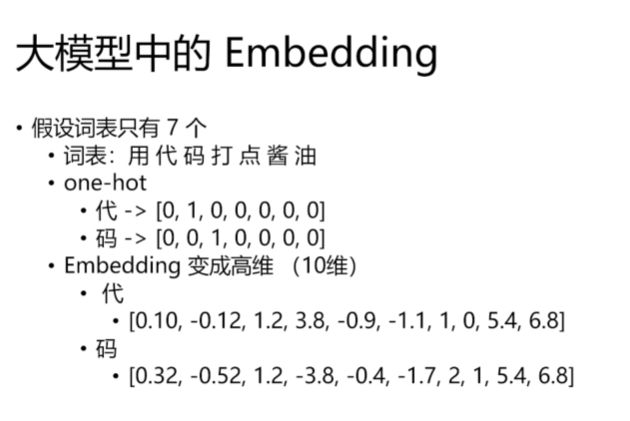

In [19]:
import gensim.downloader as api

# Download embeddings (66MB, glove, trained on wikipedia, vector size: 50)
# Other options include "word2vec-google-news-300"
# More options at https://github.com/RaRe-Technologies/gensim-data
model = api.load("glove-wiki-gigaword-50")

model.most_similar([model['king']], topn=11)

[==================================================] 100.0% 66.0/66.0MB downloaded


[('king', 1.0000001192092896),
 ('prince', 0.8236179351806641),
 ('queen', 0.7839043140411377),
 ('ii', 0.7746230363845825),
 ('emperor', 0.7736247777938843),
 ('son', 0.766719400882721),
 ('uncle', 0.7627150416374207),
 ('kingdom', 0.7542161345481873),
 ('throne', 0.7539914846420288),
 ('brother', 0.7492411136627197),
 ('ruler', 0.7434253692626953)]

In [20]:
from transformers import AutoModel, AutoTokenizer

# Load a tokenizer
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

# Load a language model
model = AutoModel.from_pretrained("bert-base-uncased")

# Tokenize the sentence
tokens = tokenizer('Hello world', return_tensors='pt')

# Process the tokens
output = model(**tokens)[0]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [22]:
output

tensor([[[-0.1689,  0.1361, -0.1394,  ..., -0.6251,  0.0522,  0.3671],
         [-0.3633,  0.1412,  0.8800,  ...,  0.1043,  0.2888,  0.3727],
         [-0.6986, -0.6988,  0.0645,  ..., -0.2210,  0.0099, -0.5940],
         [ 0.8310,  0.1237, -0.1512,  ...,  0.1031, -0.6779, -0.2629]]],
       grad_fn=<NativeLayerNormBackward0>)

In [23]:
output.shape

torch.Size([1, 4, 768])

In [24]:
tokens  # 有四个 每个词都用768维的高维向量表示  所以是1 4 768

{'input_ids': tensor([[ 101, 7592, 2088,  102]]), 'token_type_ids': tensor([[0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1]])}

In [25]:
for token in tokens['input_ids'][0]:
    print(tokenizer.decode(token))

[CLS]
hello
world
[SEP]


In [26]:
from sentence_transformers import SentenceTransformer

# Load model
model = SentenceTransformer('sentence-transformers/all-distilroberta-v1')

# Convert text to text embeddings
vector = model.encode("测试一个小模型的 embedding 能力")

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.3k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/653 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/328M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/333 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [27]:
vector.shape  # 句向量 直接把句子变成了高纬度向量空间的一个点

(768,)

# 基于 embeddings的歌曲推理

In [28]:
import pandas as pd
from urllib import request

# Get the playlist dataset file
data = request.urlopen('https://storage.googleapis.com/maps-premium/dataset/yes_complete/train.txt')

# Parse the playlist dataset file. Skip the first two lines as
# they only contain metadata
lines = data.read().decode("utf-8").split('\n')[2:]

# Remove playlists with only one song
playlists = [s.rstrip().split() for s in lines if len(s.split()) > 1]

# Load song metadata
songs_file = request.urlopen('https://storage.googleapis.com/maps-premium/dataset/yes_complete/song_hash.txt')
songs_file = songs_file.read().decode("utf-8").split('\n')
songs = [s.rstrip().split('\t') for s in songs_file]
songs_df = pd.DataFrame(data=songs, columns = ['id', 'title', 'artist'])
songs_df = songs_df.set_index('id')

In [29]:
print( 'Playlist #1:\n ', playlists[0], '\n')
print( 'Playlist #2:\n ', playlists[1])

Playlist #1:
  ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '2', '42', '43', '44', '45', '46', '47', '48', '20', '49', '8', '50', '51', '52', '53', '54', '55', '56', '57', '25', '58', '59', '60', '61', '62', '3', '63', '64', '65', '66', '46', '47', '67', '2', '48', '68', '69', '70', '57', '50', '71', '72', '53', '73', '25', '74', '59', '20', '46', '75', '76', '77', '59', '20', '43'] 

Playlist #2:
  ['78', '79', '80', '3', '62', '81', '14', '82', '48', '83', '84', '17', '85', '86', '87', '88', '74', '89', '90', '91', '4', '73', '62', '92', '17', '53', '59', '93', '94', '51', '50', '27', '95', '48', '96', '97', '98', '99', '100', '57', '101', '102', '25', '103', '3', '104', '105', '106', '107', '47', '108', '109', '110', '111', '112', '113', '25', '63', '62', '114', '115', '84', '116', '117',

In [30]:
songs_df

,title,artist
id,,
0,Gucci Time (w\/ Swizz Beatz),Gucci Mane
1,Aston Martin Music (w\/ Drake & Chrisette Mich...,Rick Ross
2,Get Back Up (w\/ Chris Brown),T.I.
3,Hot Toddy (w\/ Jay-Z & Ester Dean),Usher
4,Whip My Hair,Willow
...,...,...
75258,USA Today,Alan Jackson
75259,Superstar,Raul Malo
75260,Romancin' The Blues,Giacomo Gates


In [34]:
playlists[:2]

[['0',
  '1',
  '2',
  '3',
  '4',
  '5',
  '6',
  '7',
  '8',
  '9',
  '10',
  '11',
  '12',
  '13',
  '14',
  '15',
  '16',
  '17',
  '18',
  '19',
  '20',
  '21',
  '22',
  '23',
  '24',
  '25',
  '26',
  '27',
  '28',
  '29',
  '30',
  '31',
  '32',
  '33',
  '34',
  '35',
  '36',
  '37',
  '38',
  '39',
  '40',
  '41',
  '2',
  '42',
  '43',
  '44',
  '45',
  '46',
  '47',
  '48',
  '20',
  '49',
  '8',
  '50',
  '51',
  '52',
  '53',
  '54',
  '55',
  '56',
  '57',
  '25',
  '58',
  '59',
  '60',
  '61',
  '62',
  '3',
  '63',
  '64',
  '65',
  '66',
  '46',
  '47',
  '67',
  '2',
  '48',
  '68',
  '69',
  '70',
  '57',
  '50',
  '71',
  '72',
  '53',
  '73',
  '25',
  '74',
  '59',
  '20',
  '46',
  '75',
  '76',
  '77',
  '59',
  '20',
  '43'],
 ['78',
  '79',
  '80',
  '3',
  '62',
  '81',
  '14',
  '82',
  '48',
  '83',
  '84',
  '17',
  '85',
  '86',
  '87',
  '88',
  '74',
  '89',
  '90',
  '91',
  '4',
  '73',
  '62',
  '92',
  '17',
  '53',
  '59',
  '93',
  '94',
  '51',

In [31]:
from gensim.models import Word2Vec

# Train our Word2Vec model
model = Word2Vec(
    playlists, vector_size=32, window=20, negative=50, min_count=1, workers=4
)

In [35]:
song_id = 2172

# Ask the model for songs similar to song #2172
model.wv.most_similar(positive=str(song_id))

[('5586', 0.9982428550720215),
 ('2014', 0.998222291469574),
 ('2849', 0.9981600642204285),
 ('6658', 0.997826099395752),
 ('6624', 0.9978015422821045),
 ('5634', 0.997701108455658),
 ('5549', 0.9973087310791016),
 ('3167', 0.996938943862915),
 ('2640', 0.9969110488891602),
 ('2976', 0.99667888879776)]

In [38]:
import numpy as np
np.array(model.wv.most_similar(positive=str(song_id)))

array([['5586', '0.9982428550720215'],
       ['2014', '0.998222291469574'],
       ['2849', '0.9981600642204285'],
       ['6658', '0.997826099395752'],
       ['6624', '0.9978015422821045'],
       ['5634', '0.997701108455658'],
       ['5549', '0.9973087310791016'],
       ['3167', '0.996938943862915'],
       ['2640', '0.9969110488891602'],
       ['2976', '0.99667888879776']], dtype='<U32')

In [39]:
np.array(model.wv.most_similar(positive=str(song_id)))[:,0]

array(['5586', '2014', '2849', '6658', '6624', '5634', '5549', '3167',
       '2640', '2976'], dtype='<U32')

In [36]:
print(songs_df.iloc[2172])

title     Fade To Black
artist        Metallica
Name: 2172 , dtype: object


In [40]:
import numpy as np

def print_recommendations(song_id):
    similar_songs = np.array(
        model.wv.most_similar(positive=str(song_id),topn=5)
    )[:,0]
    return  songs_df.iloc[similar_songs]

# Extract recommendations
print_recommendations(2172)

,title,artist
id,,
5586,The Last In Line,Dio
2014,Youth Gone Wild,Skid Row
2849,Run To The Hills,Iron Maiden
6658,(Bang Your Head) Metal Health,Quiet Riot
6624,Everybody Wants Some!!!,Van Halen


In [41]:
songs_df.iloc[2172]

,2172
title,Fade To Black
artist,Metallica


In [42]:
print(songs_df.iloc[842])

print_recommendations(842)

title     California Love (w\/ Dr. Dre & Roger Troutman)
artist                                              2Pac
Name: 842 , dtype: object


,title,artist
id,,
1418,Tick Tock,Kesha
5698,Turnin' Me On (w\/ Lil Wayne),Keri Hilson
413,If I Ruled The World (Imagine That) (w\/ Laury...,Nas
329,Stronger,Kanye West
9673,Wanna Get To Know You (w\/ Joe),G-Unit
